In [88]:
import requests
import json
import pandas as pd
import re
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx
import nltk
nltk.download('popular')
stop = stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/Taylor/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/Taylor/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/Taylor/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/Taylor/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/Taylor/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/Taylor/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloadin

In [3]:
api_key = 'f0f8be8d318201330fe3f845c883fa9f45ac014f'

In [4]:
events_cache_fname = 'JaneAddams_Events.json'

In [5]:
# try:
# 	cache_file_obj = open(events_cache_fname,'r')
# 	cache_contents = cache_file_obj.read()
# 	CACHE_DICTION = json.loads(cache_contents)
# except:
# 	CACHE_DICTION = {}

# def canonical_order(d):
#     alphabetized_keys = sorted(d.keys())
#     res = []
#     for k in alphabetized_keys:
#         res.append((k, d[k]))
#     return res



In [6]:
resources_avail = requests.get('https://digital.janeaddams.ramapo.edu/api/resources?pretty_print')

In [7]:
params_d = {'item_type': 'Event', 'key': api_key}

In [8]:
r_items = requests.get('https://digital.janeaddams.ramapo.edu/api/items?pretty_print', params = params_d)

In [26]:
items_json = json.loads(r_items.text)

In [28]:
#print(r_items.text)

In [11]:
event_lst = []
for dict in items_json:
    event_lst.append(dict['element_texts'][0]['text'])
    

In [12]:
print(event_lst)

['United States Presidential Election (1912)', 'Philippine-American War (1899-1902)', 'Conference on Truancy--Its Causes and Prevention  (1906)', 'University of Chicago Convocation (1904) ', 'Annual Conference for the Study of the Negro Problems (Tenth) (1905)', 'American Home Economics Association Lake Placid Conference (Fifth) (1903)', 'United Mine Workers Coal Strike (1902)', 'Annual Convention of the American Federation of Labor (Twenty-First) (1901)', "World's Fair: Louisiana Purchase Exposition (1904)", 'Universal Peace Congress (Thirteenth) (1904)', 'Universal Races Congress (First) (1911)', 'Annual Conference for the Study of the Negro Problems (Fourteenth) (1909)', 'Illinois Conference of Charities and Correction (1907)', 'Averbuch Incident (1908)', 'Chicago Stockyard Strike (1904)', 'International Congress of Arts and Sciences, (1904)', "Chicago Teamsters' Strike (1905)", 'National Arbitration and Peace Congress (1907)', 'Annual Conference for the Study of the Negro Problems 

In [13]:
tag_list = []
for dict in items_json:
    temp_list = []
    for d in dict['tags']:
        temp_list.append(d['name'])
    tag_list.append(temp_list)

In [14]:
print(tag_list)

[['Democratic Party', 'Politics', 'Progressive Party', 'Republican Party', 'Socialism'], ['Philippines', 'War'], ['Conferences', 'Education', 'Law'], ['Education', 'Immigration', 'Lectures'], ['African-Americans', 'Conferences'], ['Conferences', 'Home Economics'], ['Labor'], ['Conferences', 'Labor'], ['Celebrations'], ['Conferences', 'Peace'], ['Conferences', 'England', 'Ethics', 'Race'], ['African-Americans', 'Civil Rights', 'Conferences', 'Racism'], ['Charity', 'Conferences', 'Illinois'], ['Chicago', 'Crime', 'Government', 'Immigrants'], ['Chicago', 'Labor'], ['Conferences'], ['Chicago', 'Labor'], ['Conferences', 'Peace', 'War'], ['African-Americans', 'Conferences', 'Racism'], ['Chicago', 'Conferences', 'Peace'], ['Immigrants', 'Russia'], ['Chicago', 'Crime Enforcement', 'Immigrants', 'Labor'], ['Chicago', 'Labor'], ['Conferences', 'Woman Suffrage'], ['Conferences', 'Peace'], ['War'], ['Conferences', 'Woman Suffrage'], ['Conferences', 'Politics', 'Progressive Party'], ['Chicago', 'La

In [15]:
dates_list = []
for item in event_lst:
    date= re.findall('\(([0-9\-)]+)', item)
    for num in date:
        dates_list.append(num.replace(")", ""))

In [16]:
print(dates_list)

['1912', '1899-1902', '1906', '1904', '1905', '1903', '1902', '1901', '1904', '1904', '1911', '1909', '1907', '1908', '1904', '1904', '1905', '1907', '1908', '1909', '1908', '1886', '1907', '1907', '1907', '1861-1865', '1903', '1912', '1905', '1911', '1893', '1912', '1915', '1840', '1912', '1915', '1915', '1915-1916', '1916', '1912', '1912', '1903', '1894', '1913', '1909', '1912', '1915']


In [17]:
zip_events = list(zip(event_lst, tag_list, dates_list))

In [18]:
events_df = pd.DataFrame(zip_events, columns = ['Event Name', 'Tags', 'Date']) 

In [19]:
events_df.head(50)

,Event Name,Tags,Date
0,United States Presidential Election (1912),"[Democratic Party, Politics, Progressive Party...",1912
1,Philippine-American War (1899-1902),"[Philippines, War]",1899-1902
2,Conference on Truancy--Its Causes and Preventi...,"[Conferences, Education, Law]",1906
3,University of Chicago Convocation (1904),"[Education, Immigration, Lectures]",1904
4,Annual Conference for the Study of the Negro P...,"[African-Americans, Conferences]",1905
5,American Home Economics Association Lake Placi...,"[Conferences, Home Economics]",1903
6,United Mine Workers Coal Strike (1902),[Labor],1902
7,Annual Convention of the American Federation o...,"[Conferences, Labor]",1901
8,World's Fair: Louisiana Purchase Exposition (1...,[Celebrations],1904
9,Universal Peace Congress (Thirteenth) (1904),"[Conferences, Peace]",1904


In [20]:
tag_count_d = {}
for item in tag_list:
    for tag in item:
        if tag in tag_count_d:
            tag_count_d[tag] += 1 
        else:
            tag_count_d[tag] = 1
        
    
        
    
    

In [241]:
p_params_d = {'item_type': 'Person', 'key': api_key}

In [242]:
people_request = requests.get('https://digital.janeaddams.ramapo.edu/api/items?', params = p_params_d)

In [243]:
people_items_json = json.loads(people_request.text)

In [244]:
#print(json.dumps(people_items_json, indent=4))

In [245]:
#pulling names:
name_list = []
for dict in people_items_json:
    for element in dict["element_texts"]:
        if element["element"]["name"] == "Title":
            name_list.append(element["text"])

In [246]:
print(name_list)

['Addams, Jane (1860-1935)', 'Roosevelt, Theodore (1858-1919)', 'Fawcett, Millicent  Garrett (1847-1929)', 'Kellor, Frances Alice (1873-1952)', 'Johnson, Hiram W. (1866-1945)', 'Pankhurst, Emmeline Goulden  (1858-1928)', 'Harper, Ida Husted (1853-1931)', 'Dodge, Caroline L. (1869-1923)', 'Breasted, James Henry (1865-1935)', 'Ely, Richard T. (1854–1943)', 'Ely, Anna M. Anderson (1860-1923)', 'Coit, Stanton (1857–1944)', 'Clark, John (1870?-?)', 'Haldeman-Julius, Anna Marcet (1887-1941)', 'Jean Marcet', 'Wald, Lillian D. (1867–1940)', 'Maltbie, Milo Roy (1871-1962)', 'Fox, Richard T. (1871-1937)', 'Meade, Charles A. (1876-1949)', 'Baldauf, Minnie Lina (1872-1942)', 'Hill, Mary Dorsey Anderson (1868-1958)', 'Berger, Meta Schlichting (1873-1944)', 'Brownell, Baker (1887–1965)', 'Abee, Robert (?-?)', 'Haldeman, Sarah Alice Addams (1853-1915)', 'White, William Allen (1868-1944)', 'Linn, John Addams (1872-1918)', 'Faville, Frederick F. (1865-1954)', 'Sax, Stella Rosenfield (1864-1928)', 'Wein

In [247]:
#pulling tags
people_tag_list = []
for dict in people_items_json:
    temp_list = []
    for d in dict['tags']:
        temp_list.append(d['name'])
    people_tag_list.append(temp_list)

In [248]:
print(people_tag_list)

[['Civil Rights', 'Education', 'Hull-House', 'Peace', 'Progressive Party', 'Settlement Movement', 'Social Work', 'Woman Suffrage', 'Women'], ['Men', 'Military', 'Politics', 'Progressive Party', 'Republican Party'], ['Civil Rights', 'England', 'Social Reform', 'Woman Suffrage', 'Women'], ['Labor', 'Law', 'Progressive Party', 'Women'], ['Men', 'Politics', 'Progressive Party'], ['Crime', 'England', 'Politics', 'Woman Suffrage', 'Women'], ['Journalism', 'Woman Suffrage', 'Women'], [], ['Education', 'Men'], ['Economics', 'Education', 'Men'], ['Housework', 'Women'], ['England', 'Religion', 'Settlement Movement'], ['Chicago', 'Law', 'Men'], ['Family', 'Women'], ['Medicine', 'Peace', 'Public Health', 'Settlement Movement', 'Woman Suffrage', 'Women'], ['Men', 'Utilities'], ['Civil Service', 'Men'], [], ['Settlements', 'Women'], ['Settlements', 'Women'], ['Education', 'Journalism', 'Peace', 'Socialism', 'Women'], ['Education', 'Journalism', 'Men', 'Philosophy'], ['Men'], ['Family', 'Finance', 'W

In [249]:
#pulling text
text_list = []
for dict in people_items_json:
    for element in dict["element_texts"]:
        if element["element"]["name"] == "Biographical Text":
            text_list.append(element["text"])

In [250]:
#print(text_list)

In [251]:
#pulling occupation
occupation_list = []
for dict in people_items_json:
    for element in dict["element_texts"]:
        if element["element"]["name"] == "Occupation":
            occupation_list.append(element["text"])

In [252]:
#print(occupation_list)

In [253]:
people_zip = list(zip(name_list, occupation_list, people_tag_list, text_list))

In [254]:
people_df = pd.DataFrame(people_zip, columns = ['Name', 'Occupation', 'Tags', 'Text']) 

In [255]:
#creating newtork graph

In [256]:
G = nx.Graph()

In [257]:
def ie_preprocess(document):
    document = ' '.join([i for i in document.split() if i not in stop])
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [258]:
def extract_names(document):
    names = []
    sentences = ie_preprocess(document)
    for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
    return names    
    
    
    
    

In [259]:
#doc = """Laura Jane Addams was born in 1860 to affluent parents, John Huy Addams and Sarah Weber Addams in Cedarville, IL, Her mother died when she was only two years old, and her father remarried in 1868. Addams was a bright child who was tutored by her father. Jane Addams enrolled in Rockford Female Seminary in 1877 and excelled in her studies. She was recognized as a leader at the College, serving as class president for four years and as valedictorian at her 1881 graduation. Addams had hopes to go to Smith College and eventually to medical school and to serve society, but the 1881 death of her father changed her circumstances.<br /><br />Addams instead was needed at home, to serve as a companion for her step-mother, Anna Haldeman Addams. The pair moved to Philadelphia where Addams attempted to pursue her dream at the Women's Medical College of Philadelphia, but she was unable to do so. She traveled abroad with her step-mother, studying language and art history, but found herself in a depression as societal roles pressed upon her plans for her future. <br /><br />During her years after college, Addams developed her ideas about democracy, charity, and class that helped inform her work with Hull-House. In 1888 Addams toured Europe again, this time with her Rockford College friend, Ellen Gates Starr, where the two came upon the "settlement house" Toynbee Hall for the first time. Addams and Starr determined to create their own settlement house in Chicago, using much of Addams's inheritance from her father to fund the effort. They located a site, in Chicago's 19th Ward, and set up Hull-House in 1890, offering classes and services to their immigrant neighbors. <br /><br />At Hull-House, Addams worked together to make the settlement a success. Starr focused on the administrative work while Addams was the public face of the settlement. Addams sought assistance from the influential Chicago Women's Club, and rapidly became known in the city for her useful works. She attracted volunteers and financial support for her work, which she used to provide more services to her neighbors.<br /><br />Addams was a prolific writer and she wrote about the benefits the settlement work brought to the middle-class workers and well as to the neighbors, gaining a reputation as a progressive thinker that made Hull-House the best known settlement, albeit one that's democratic character made it unique in its operation. Hull-House created a place where social reform activists, chiefly, but not solely women, were able to collaborate and make effective change in laws, economics, and health care. <br /><br />Addams built relationships with wealthy funders, such as Louise deKoven Bowen and Mary Rozet Smith that helped to expand Hull-House's capabilities far past what her own limited wealth could support. Addams used Hull-House as a pulpit from which she could attempt to change the way society treated workers and the less fortunate. After 1900 she became increasingly involved in city, and then national politics and became a well-traveled and sought-after speaker. <br /><br />Addams had a rich writing career, taking her lectures and editing them into a series of topical books. She published:\r\n<p><em>Democracy and Social Ethics (</em>1902), <em>Newer Ideals of Peace</em> (1907), <em>The Spirit of Youth and the City Streets</em> (1909), <em>Twenty Years at Hull-House</em> <em>with Autobiographical Notes</em> (1910), <em>A New Conscience and an Ancient Evil</em> (1912), <em>The Long Road of Woman’s Memory,</em> (1916), <em>Peace and Bread in Time of War</em> (1922), <em>The Second Twenty Years at Hull-House</em>, <em>September 1909 to September 1929, With a</em> <em>Record of a Growing Consciousness</em> (1930), <em>The Excellent Becomes the Permanent </em>(1932), and <em>My Friend, Julia Lathrop</em>. New York: Macmillan (1935).</p>\r\n<p>Addams sometimes found the practical application of her theories difficult because there was no shared goal amongst activists. Addams served on the Chicago Board of Education from 1905-1909, finding that putting her theories on mediation into practical use were difficult. She found it difficult to deal with partisans who had no taste for compromise. When she became involved in the suffrage movement, Addams likewise avoided supporting any of the warring factions in the movement, staying above the fray. In 1912, Addams was briefly drawn into politics, when she supported Theodore Roosevelt's Progressive Party campaign for president, but after his defeat she withdrew from active participation.</p>\r\n<p>With the outbreak of World War I, Addams's strong and consistent calls for peace put her in the public spotlight. She called for mediation between the warring countries, not armed conflict and did not adjust her rhetoric when the United States entered the war. Addams was accused of being a partisan, a traitor, or a naive fool, but she ignored all attacks and threw herself into organizing for peace. Addams worked with other women in the United States and abroad to lobby for peace, with the Woman's Peace Party and the Women's International League for Peace and Freedom. Addams believed that peace was a reform that women saw in a unique way and underscored her conviction that women needed an equal say in politics and society.</p>\r\n<p>Addams devoted the remainder of her public life to peace activism, though she maintained her work with Hull-House throughout her life. She worked to support and publicize the work of peace organizations around the world, traveling around the world and working with women's organizations to encourage activism.</p>\r\n<p>In 1931, Addams was awarded the Nobel Peace Prize (sharing the award with Nicholas Murray Butler), a vindication of her stalwart support for peace in the trying&nbsp; circumstances surrounding the war. By this time, Addams was winding down, her many health problems taking a toll on her ability to be as active as she once was. Addams died of abdominal cancer on May 21, 1935.</p>\r\n<p>Addams never married; instead she had a life-long romantic attachment to Mary Rozet Smith. The two women were constant companions, traveled together and expressed their love in letters.</p>"""

In [261]:
new_names = []
for item in name_list:
    x = re.sub('\(([0-9\-)]+)', '', item)
    new_names.append(x)



print(new_names)

['Addams, Jane ', 'Roosevelt, Theodore ', 'Fawcett, Millicent  Garrett ', 'Kellor, Frances Alice ', 'Johnson, Hiram W. ', 'Pankhurst, Emmeline Goulden  ', 'Harper, Ida Husted ', 'Dodge, Caroline L. ', 'Breasted, James Henry ', 'Ely, Richard T. –1943)', 'Ely, Anna M. Anderson ', 'Coit, Stanton –1944)', 'Clark, John ?-?)', 'Haldeman-Julius, Anna Marcet ', 'Jean Marcet', 'Wald, Lillian D. –1940)', 'Maltbie, Milo Roy ', 'Fox, Richard T. ', 'Meade, Charles A. ', 'Baldauf, Minnie Lina ', 'Hill, Mary Dorsey Anderson ', 'Berger, Meta Schlichting ', 'Brownell, Baker –1965)', 'Abee, Robert (?-?)', 'Haldeman, Sarah Alice Addams ', 'White, William Allen ', 'Linn, John Addams ', 'Faville, Frederick F. ', 'Sax, Stella Rosenfield ', 'Weintraub, J. (?-?)', 'Blaine, Anita McCormick ', 'Kelley, Florence ', 'Linn, John Manning ', 'Linn, James Weber ', 'Linn, Stanley Ross ', 'Moody, William Vaughn ', 'Tolstoy, Leo ', 'Tolstoy, Lev Nikolayevich', 'Jones, Jenkin Lloyd ', 'Hosmer, James Kendall ', 'Simmons, 

In [165]:
pd.options.display.max_colwidth = 50000

In [166]:
#people_df.loc[[0], "Biographical Text" ]

In [167]:
#building intial graph nodes
for index, row in people_df.iterrows():
    G.add_node(row.Name)
    

In [177]:
#extracting names from text
for index, row in people_df.iterrows():
    test = []
    test.append(extract_names(row.Text))
    people_df.loc[index,'Colleagues'] = test



In [229]:
for index, row in people_df.iterrows():
    ugh = str(row.Colleagues)
    ugh_2 = ugh.split(",")
    for word in ugh_2:
        if word in people_df["Name"] == True:
            G.add_edge(row.Name, word)
# people_df.head()

In [235]:
# t = people_df.loc[0, 'Colleagues']
# s = str(t)
# split = s.split(",")
# print(type(split[0]))

['Addams, Jane (1860-1935)', 'Roosevelt, Theodore (1858-1919)', 'Fawcett, Millicent  Garrett (1847-1929)', 'Kellor, Frances Alice (1873-1952)', 'Johnson, Hiram W. (1866-1945)', 'Pankhurst, Emmeline Goulden  (1858-1928)', 'Harper, Ida Husted (1853-1931)', 'Dodge, Caroline L. (1869-1923)', 'Breasted, James Henry (1865-1935)', 'Ely, Richard T. (1854–1943)', 'Ely, Anna M. Anderson (1860-1923)', 'Coit, Stanton (1857–1944)', 'Clark, John (1870?-?)', 'Haldeman-Julius, Anna Marcet (1887-1941)', 'Jean Marcet', 'Wald, Lillian D. (1867–1940)', 'Maltbie, Milo Roy (1871-1962)', 'Fox, Richard T. (1871-1937)', 'Meade, Charles A. (1876-1949)', 'Baldauf, Minnie Lina (1872-1942)', 'Hill, Mary Dorsey Anderson (1868-1958)', 'Berger, Meta Schlichting (1873-1944)', 'Brownell, Baker (1887–1965)', 'Abee, Robert (?-?)', 'Haldeman, Sarah Alice Addams (1853-1915)', 'White, William Allen (1868-1944)', 'Linn, John Addams (1872-1918)', 'Faville, Frederick F. (1865-1954)', 'Sax, Stella Rosenfield (1864-1928)', 'Wein

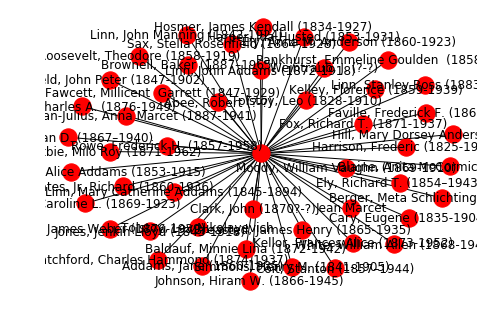

In [231]:
nx.draw(G, with_labels = True)

NameError: name 'plt' is not defined